In [1]:
!pip install matplotlib
!pip install seaborn

In [1]:
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter

In [2]:
DATAROOT = '../datasets'
VOCAB_FILE = os.path.join(DATAROOT, 'training_vocab.txt')
TRAIN_FILE = os.path.join(DATAROOT, 'training.txt')
TEST_FILE = os.path.join(DATAROOT, 'test.txt')

vocab = set()
train_set = []
test_set = []

with open(VOCAB_FILE, 'r', encoding='utf-8') as f:
    vocab = set(map(str.strip, f.readlines()))

with open(TRAIN_FILE, 'r', encoding='utf-8') as f:
    train_set = list(map(str.strip, f.readlines()))

with open(TEST_FILE, 'r', encoding='utf-8') as f:
    test_set = list(map(str.strip, f.readlines()))

In [3]:
print('vocab size ', len(vocab))
print('training set size: ', len(train_set))
print('test set size: ', len(test_set))
print("ten item of training set")
print(train_set[:5])
print("ten item of test set")
print(test_set[:5])

vocab size  55303
training set size:  19056
test set size:  1944
ten item of training set
['迈向  充满  希望  的  新  世纪  ——  一九九八年  新年  讲话  （  附  图片  １  张  ）', '中共中央  总书记  、  国家  主席  江  泽民', '（  一九九七年  十二月  三十一日  ）', '１２月  ３１日  ，  中共中央  总书记  、  国家  主席  江  泽民  发表  １９９８年  新年  讲话  《  迈向  充满  希望  的  新  世纪  》  。  （  新华社  记者  兰  红光  摄  ）', '同胞  们  、  朋友  们  、  女士  们  、  先生  们  ：']
ten item of test set
['共同  创造  美好  的  新  世纪  ——  二○○一年  新年  贺词', '（  二○○○年  十二月  三十一日  ）  （  附  图片  1  张  ）', '女士  们  ，  先生  们  ，  同志  们  ，  朋友  们  ：', '2001年  新年  钟声  即将  敲响  。  人类  社会  前进  的  航船  就要  驶入  21  世纪  的  新  航程  。  中国  人民  进入  了  向  现代化  建设  第三  步  战略  目标  迈进  的  新  征程  。', '在  这个  激动人心  的  时刻  ，  我  很  高兴  通过  中国  国际  广播  电台  、  中央  人民  广播  电台  和  中央  电视台  ，  向  全国  各族  人民  ，  向  香港  特别  行政区  同胞  、  澳门  特别  行政区  同胞  和  台湾  同胞  、  海外  侨胞  ，  向  世界  各国  的  朋友  们  ，  致以  新  世纪  第一  个  新年  的  祝贺  ！']


In [4]:
train_set_split = [line.split('  ') for line in train_set]

In [5]:
len(train_set) == len(train_set_split)

True

In [6]:
train_set_split[:5]

[['迈向',
  '充满',
  '希望',
  '的',
  '新',
  '世纪',
  '——',
  '一九九八年',
  '新年',
  '讲话',
  '（',
  '附',
  '图片',
  '１',
  '张',
  '）'],
 ['中共中央', '总书记', '、', '国家', '主席', '江', '泽民'],
 ['（', '一九九七年', '十二月', '三十一日', '）'],
 ['１２月',
  '３１日',
  '，',
  '中共中央',
  '总书记',
  '、',
  '国家',
  '主席',
  '江',
  '泽民',
  '发表',
  '１９９８年',
  '新年',
  '讲话',
  '《',
  '迈向',
  '充满',
  '希望',
  '的',
  '新',
  '世纪',
  '》',
  '。',
  '（',
  '新华社',
  '记者',
  '兰',
  '红光',
  '摄',
  '）'],
 ['同胞', '们', '、', '朋友', '们', '、', '女士', '们', '、', '先生', '们', '：']]

In [7]:
cnt = Counter()
for line in train_set_split:
    cnt.update(line)

In [8]:
len(cnt) < len(vocab)

False

In [9]:
cnt0 = Counter(train_set_split[0])
print(len(train_set_split[0]))
print(len(cnt0))
print(cnt0)

16
16
Counter({'迈向': 1, '充满': 1, '希望': 1, '的': 1, '新': 1, '世纪': 1, '——': 1, '一九九八年': 1, '新年': 1, '讲话': 1, '（': 1, '附': 1, '图片': 1, '１': 1, '张': 1, '）': 1})


In [10]:
cnt.most_common()

[('，', 74141),
 ('的', 53890),
 ('。', 35602),
 ('、', 22979),
 ('在', 12016),
 ('了', 11452),
 ('和', 10822),
 ('是', 10006),
 ('“', 7905),
 ('”', 7878),
 ('一', 7251),
 ('为', 4685),
 ('有', 4486),
 ('不', 4479),
 ('（', 4265),
 ('）', 4265),
 ('上', 3847),
 ('对', 3716),
 ('中', 3662),
 ('中国', 3322),
 ('：', 3197),
 ('发展', 3187),
 ('这', 3172),
 ('要', 2898),
 ('到', 2898),
 ('多', 2898),
 ('与', 2885),
 ('他', 2816),
 ('也', 2762),
 ('等', 2753),
 ('人', 2661),
 ('；', 2614),
 ('个', 2603),
 ('就', 2579),
 ('说', 2552),
 ('经济', 2544),
 ('年', 2483),
 ('工作', 2392),
 ('将', 2392),
 ('地', 2374),
 ('以', 2332),
 ('企业', 2314),
 ('新', 2274),
 ('大', 2225),
 ('记者', 2113),
 ('国家', 2024),
 ('从', 2019),
 ('我们', 2007),
 ('《', 1923),
 ('》', 1923),
 ('两', 1922),
 ('都', 1888),
 ('一个', 1865),
 ('出', 1832),
 ('我', 1764),
 ('１月', 1754),
 ('建设', 1735),
 ('问题', 1701),
 ('着', 1669),
 ('已', 1589),
 ('而', 1586),
 ('市场', 1576),
 ('全国', 1570),
 ('来', 1567),
 ('人民', 1563),
 ('并', 1549),
 ('把', 1548),
 ('元', 1518),
 ('还', 1509),
 ('本报', 144

In [11]:
!pip install wordcloud

In [12]:
from wordcloud import WordCloud

In [13]:
npcnt = np.array(cnt.most_common())

In [14]:
import pandas as pd

In [15]:
cnt_series = pd.Series(cnt.most_common())

In [27]:
print("每个词平均出现次数：", sum(cnt.values()) / len(cnt))

每个词平均出现次数： 20.062340713962946


In [29]:
words, times = [], []
for word, time in cnt.most_common():
    words.append(word), times.append(time)

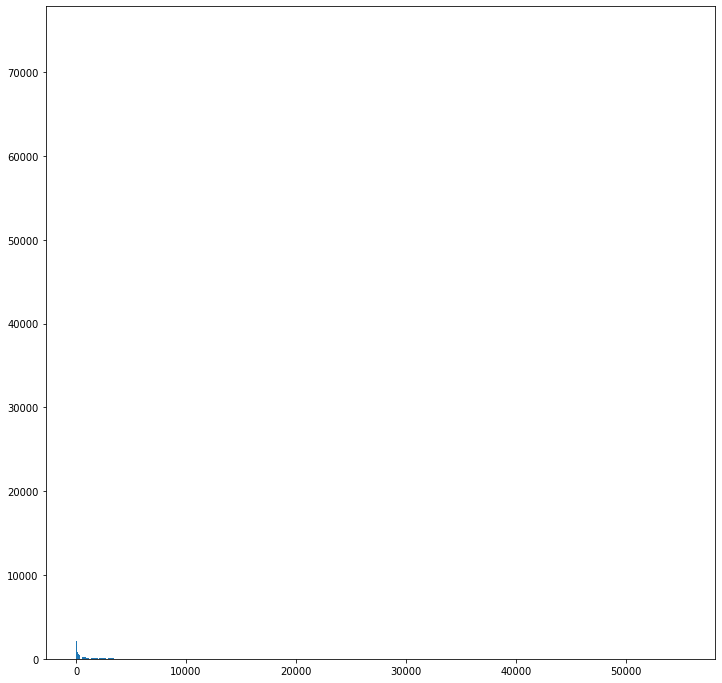

In [38]:
plt.figure(figsize=(12, 12))
plt.bar(range(len(times)), times)
plt.show()

In [47]:
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号

In [48]:
from nltk.probability import FreqDist

In [49]:

frqdist = FreqDist(cnt)

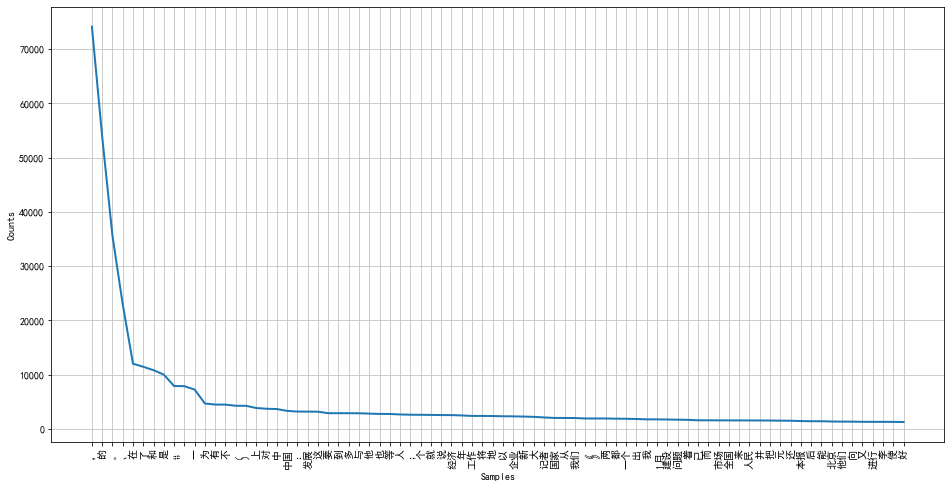

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [54]:
plt.figure(figsize=(16, 8))
plt.grid(False)
frqdist.plot(80)

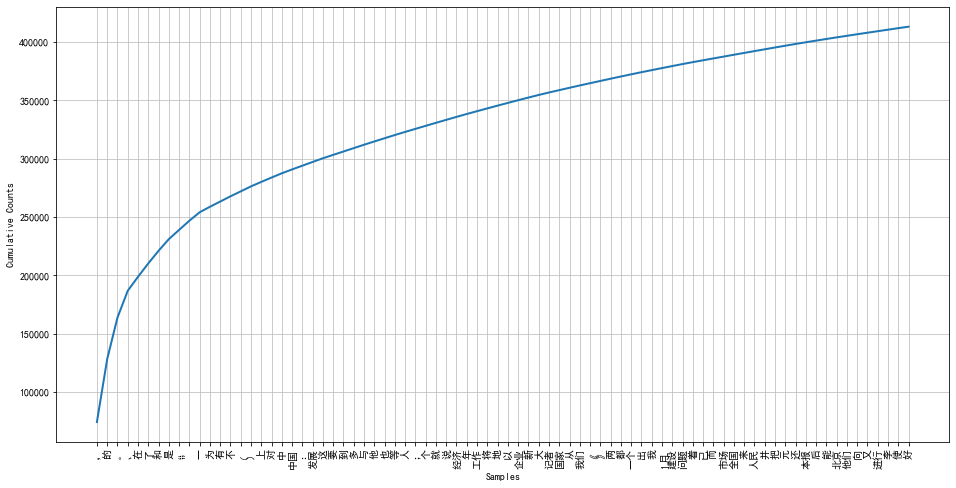

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [55]:
plt.figure(figsize=(16, 8))
plt.grid(False)
frqdist.plot(80, cumulative=True)

In [52]:
cnt.most_common()

[('，', 74141),
 ('的', 53890),
 ('。', 35602),
 ('、', 22979),
 ('在', 12016),
 ('了', 11452),
 ('和', 10822),
 ('是', 10006),
 ('“', 7905),
 ('”', 7878),
 ('一', 7251),
 ('为', 4685),
 ('有', 4486),
 ('不', 4479),
 ('（', 4265),
 ('）', 4265),
 ('上', 3847),
 ('对', 3716),
 ('中', 3662),
 ('中国', 3322),
 ('：', 3197),
 ('发展', 3187),
 ('这', 3172),
 ('要', 2898),
 ('到', 2898),
 ('多', 2898),
 ('与', 2885),
 ('他', 2816),
 ('也', 2762),
 ('等', 2753),
 ('人', 2661),
 ('；', 2614),
 ('个', 2603),
 ('就', 2579),
 ('说', 2552),
 ('经济', 2544),
 ('年', 2483),
 ('工作', 2392),
 ('将', 2392),
 ('地', 2374),
 ('以', 2332),
 ('企业', 2314),
 ('新', 2274),
 ('大', 2225),
 ('记者', 2113),
 ('国家', 2024),
 ('从', 2019),
 ('我们', 2007),
 ('《', 1923),
 ('》', 1923),
 ('两', 1922),
 ('都', 1888),
 ('一个', 1865),
 ('出', 1832),
 ('我', 1764),
 ('１月', 1754),
 ('建设', 1735),
 ('问题', 1701),
 ('着', 1669),
 ('已', 1589),
 ('而', 1586),
 ('市场', 1576),
 ('全国', 1570),
 ('来', 1567),
 ('人民', 1563),
 ('并', 1549),
 ('把', 1548),
 ('元', 1518),
 ('还', 1509),
 ('本报', 144